In [1]:
import pandas as pd
import obspy as obs
import matplotlib.pyplot as plt

from obspy.signal import PPSD
from andbro__querrySeismoData import __querrySeismoData
from andbro__makeplot_trace_spectrum import __makeplot_trace_and_spectrum
from andbro__filterStream import __filterStream
from andbro__makeplot_trace_spectrogram import __makeplot_trace_spectrogram
from andbro__rotate_STS2 import __rotate_STS2

In [2]:
def __get_inventory_from_client(config):

    from obspy.clients.fdsn import Client

    cli = Client(base_url=config['client'], timeout=100)

    try:
        inv = cli.get_stations(network=config['seed'].split(".")[0],
                               station=config['seed'].split(".")[1],
                               location=config['seed'].split(".")[2],
                               channel='*',
                               starttime=tbeg,
                               endtime=tend,
                               level="response")
    except:
        print(f"ERROR: failed to load inventory for {config['seed'].split('.')[1]}!")

    return inv

In [3]:
config = {}

config['seed'] = "BW.DROMY..FJW"
# config['seed'] = "BW.ROMY..HJU"

## before
config['tbeg'] = "2022-03-24 13:00"
config['tend'] = "2022-03-24 14:50"

## after
config['tbeg'] = "2022-03-23 15:30"
config['tend'] = "2022-03-23 16:10"


## after Ulli & Jan visit and Monobeam installation
config['tbeg'] = "2022-03-31 19:00"
config['tend'] = "2022-03-31 19:30"

## after closing open ends
config['tbeg'] = "2022-04-05 06:00"
config['tend'] = "2022-04-05 07:00"

## supposed cross-talk RV & RW
config['tbeg'] = "2022-04-01 14:00"
config['tend'] = "2022-04-01 15:00"


if config['seed'].split(".")[3][0] == "F":
    config['repo'] = "archive"
else:
    config['repo'] = "george"
    
config['path'] = None

config['client'] = "http://george"

## Load Data

Coordinates could not be attached to Inventory!


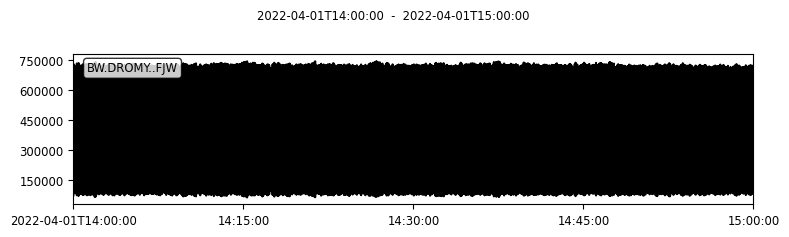

In [4]:
st00, inv = __querrySeismoData(
                            seed_id=config.get("seed"),
                            starttime=config.get("tbeg"),
                            endtime=config.get("tend"),
                            repository=config.get("repo"),
                            path=config['path'],
                            restitute=False,
                            detail=True,
                            fill_value=None,
                            )

st00.plot(equal_scale=False);

In [5]:
st = st00.copy()

if False:
    st.detrend('demean')

    # st.remove_response(inv, output="VEL", zero_mean=True)


    st.taper(0.1)

    fmin, fmax = 0.001, 60
    # st.filter('bandpass', freqmin=fmin, freqmax=fmax, corners=4, zerophase=True)
    st.filter('lowpass', freq=fmax, corners=8, zerophase=True)
    # st.filter('highpass', freq=fmin, corners=4, zerophase=True)
    # st.filter('bandstop', freqmin=0.05, freqmax=0.08, corners=4)

    st.resample(fmax*2)

    st.plot(equal_scale=False);

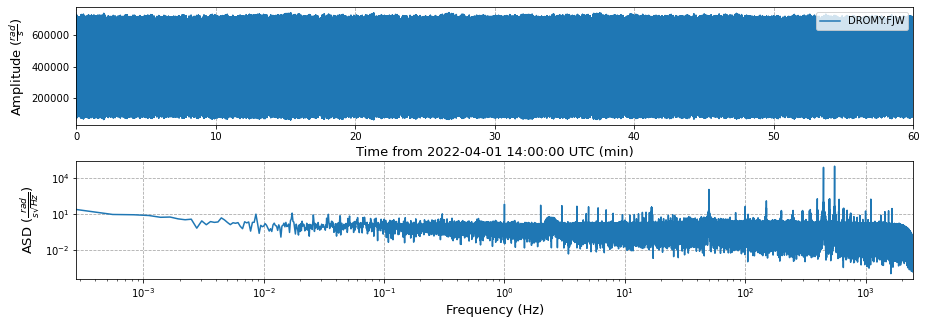

(<Figure size 1080x360 with 2 Axes>,
 array([  2.77777762e-04,   5.55555525e-04,   8.33333287e-04, ...,
          2.49999903e+03,   2.49999931e+03,   2.49999958e+03]),
 array([  2.40505970e+01,   9.21510990e+00,   8.70224790e+00, ...,
          4.59088659e-02,   3.59312963e-02,   1.68581547e-02]))

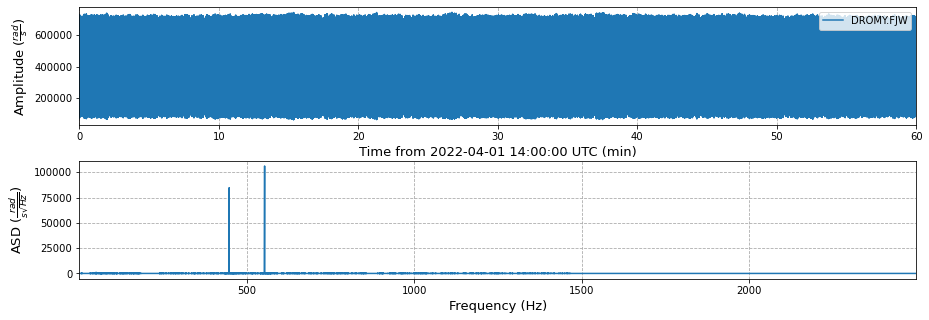

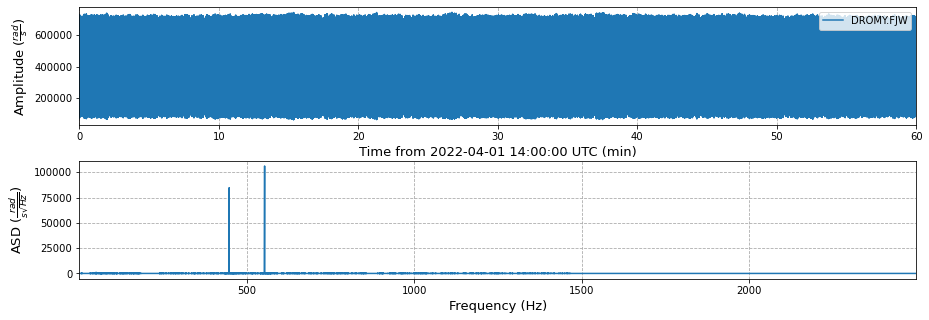

NameError: name 'ASD' is not defined

In [6]:
for tr in st:
    __makeplot_trace_and_spectrum(tr, fmax=0.5/tr.stats.delta, axis_scale="loglog", grid=True, smoothing=None, fulloutput=True, flip=True);
    __makeplot_trace_and_spectrum(tr, fmax=0.5/tr.stats.delta, axis_scale="linlin", grid=True, smoothing=None, fulloutput=False, flip=True);

plt.show();

In [ ]:
# params = [1048, 128, 32]

# for tr in st:
#     __makeplot_trace_spectrogram(tr, unit='hour', normalize=True, spec_param=params);
# plt.show();

### Cut a Section 

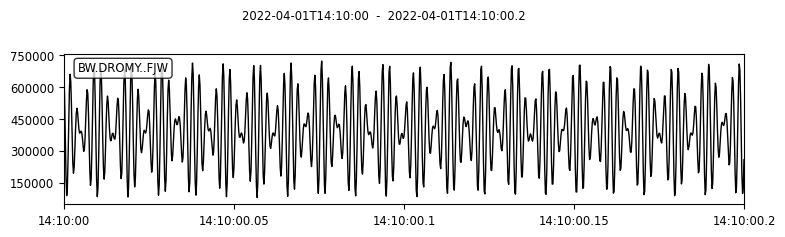

In [11]:
st2 = st.copy()
st2 = st2.trim(obs.UTCDateTime("2022-04-01 14:10"),obs.UTCDateTime("2022-04-01 14:10:0.2"))

st2.plot();

In [ ]:
st